In [42]:
# Dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [43]:
# Read the dataset file with the Pandas 
dataset_df = pd.read_csv("../Resources/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Display the dataframe
dataset_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [44]:
# Dimension of dataset
dataset_shape = dataset_df.shape
print(f"Number of rows in dataset: {dataset_shape[0]}")
print(f"Number of columns in dataset: {dataset_shape[1]}")

Number of rows in dataset: 1470
Number of columns in dataset: 35


In [45]:
# Dataset infomation
dataset_type = dataset_df.info()
dataset_type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [46]:
# Total number of samples
total_samples = dataset_df.shape[0]

# Number of employees who left (attrition) and who stayed
attrition_counts = dataset_df['Attrition'].value_counts()
print (attrition_counts)

Attrition
No     1233
Yes     237
Name: count, dtype: int64


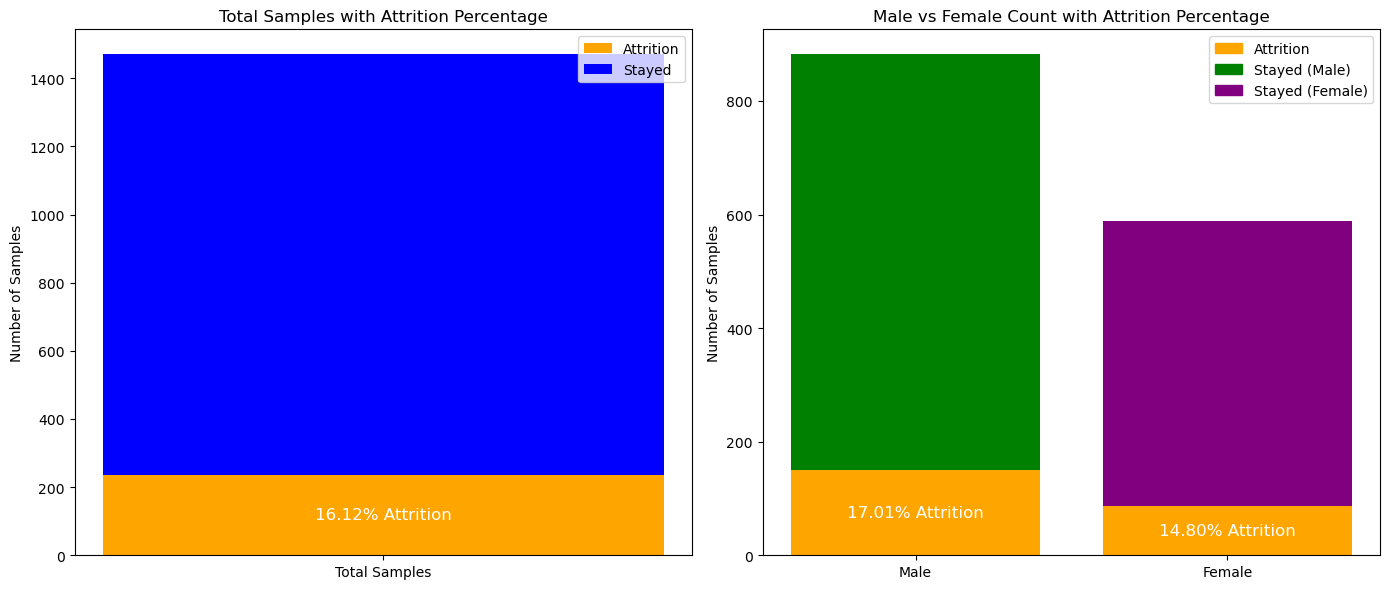

In [47]:

# Number of male and female employees who left (attrition) and who stayed
gender_attrition_counts = dataset_df.groupby('Gender')['Attrition'].value_counts()

# Calculate the percentage of attrition for males and females
male_total = gender_attrition_counts['Male'].sum()
female_total = gender_attrition_counts['Female'].sum()

male_attrition_percentage = (gender_attrition_counts['Male', 'Yes'] / male_total) * 100
female_attrition_percentage = (gender_attrition_counts['Female', 'Yes'] / female_total) * 100

# Plot the data
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Stacked bar chart for total samples with attrition at the bottom
axs[0].bar('Total Samples', attrition_count, color='orange', label='Attrition')
axs[0].bar('Total Samples', stayed_count, bottom=attrition_count, color='blue', label='Stayed')
axs[0].set_title('Total Samples with Attrition Percentage')
axs[0].set_ylabel('Number of Samples')
axs[0].legend()

# Annotate the percentage of attrition on the orange part
axs[0].text(0, attrition_count / 2, f'{attrition_percentage:.2f}% Attrition', ha='center', va='center', fontsize=12, color='white')

# Stacked bar chart for gender distribution including attrition
axs[1].bar('Male', gender_attrition_counts['Male', 'Yes'], color='orange')
axs[1].bar('Male', gender_attrition_counts['Male', 'No'], bottom=gender_attrition_counts['Male', 'Yes'], color='green')

axs[1].bar('Female', gender_attrition_counts['Female', 'Yes'], color='orange')
axs[1].bar('Female', gender_attrition_counts['Female', 'No'], bottom=gender_attrition_counts['Female', 'Yes'], color='purple')

# Annotate the percentage of attrition on the orange parts
axs[1].text(0, gender_attrition_counts['Male', 'Yes'] / 2, f'{male_attrition_percentage:.2f}% Attrition', ha='center', va='center', fontsize=12, color='white')
axs[1].text(1, gender_attrition_counts['Female', 'Yes'] / 2, f'{female_attrition_percentage:.2f}% Attrition', ha='center', va='center', fontsize=12, color='white')

axs[1].set_title('Male vs Female Count with Attrition Percentage')
axs[1].set_ylabel('Number of Samples')

# Manually create the legend for the Male vs Female chart
custom_legend = [
    plt.Rectangle((0,0),1,1, color='orange'),
    plt.Rectangle((0,0),1,1, color='green'),
    plt.Rectangle((0,0),1,1, color='purple')
]
axs[1].legend(custom_legend, ['Attrition', 'Stayed (Male)', 'Stayed (Female)'], loc='upper right')

plt.tight_layout()
plt.show()

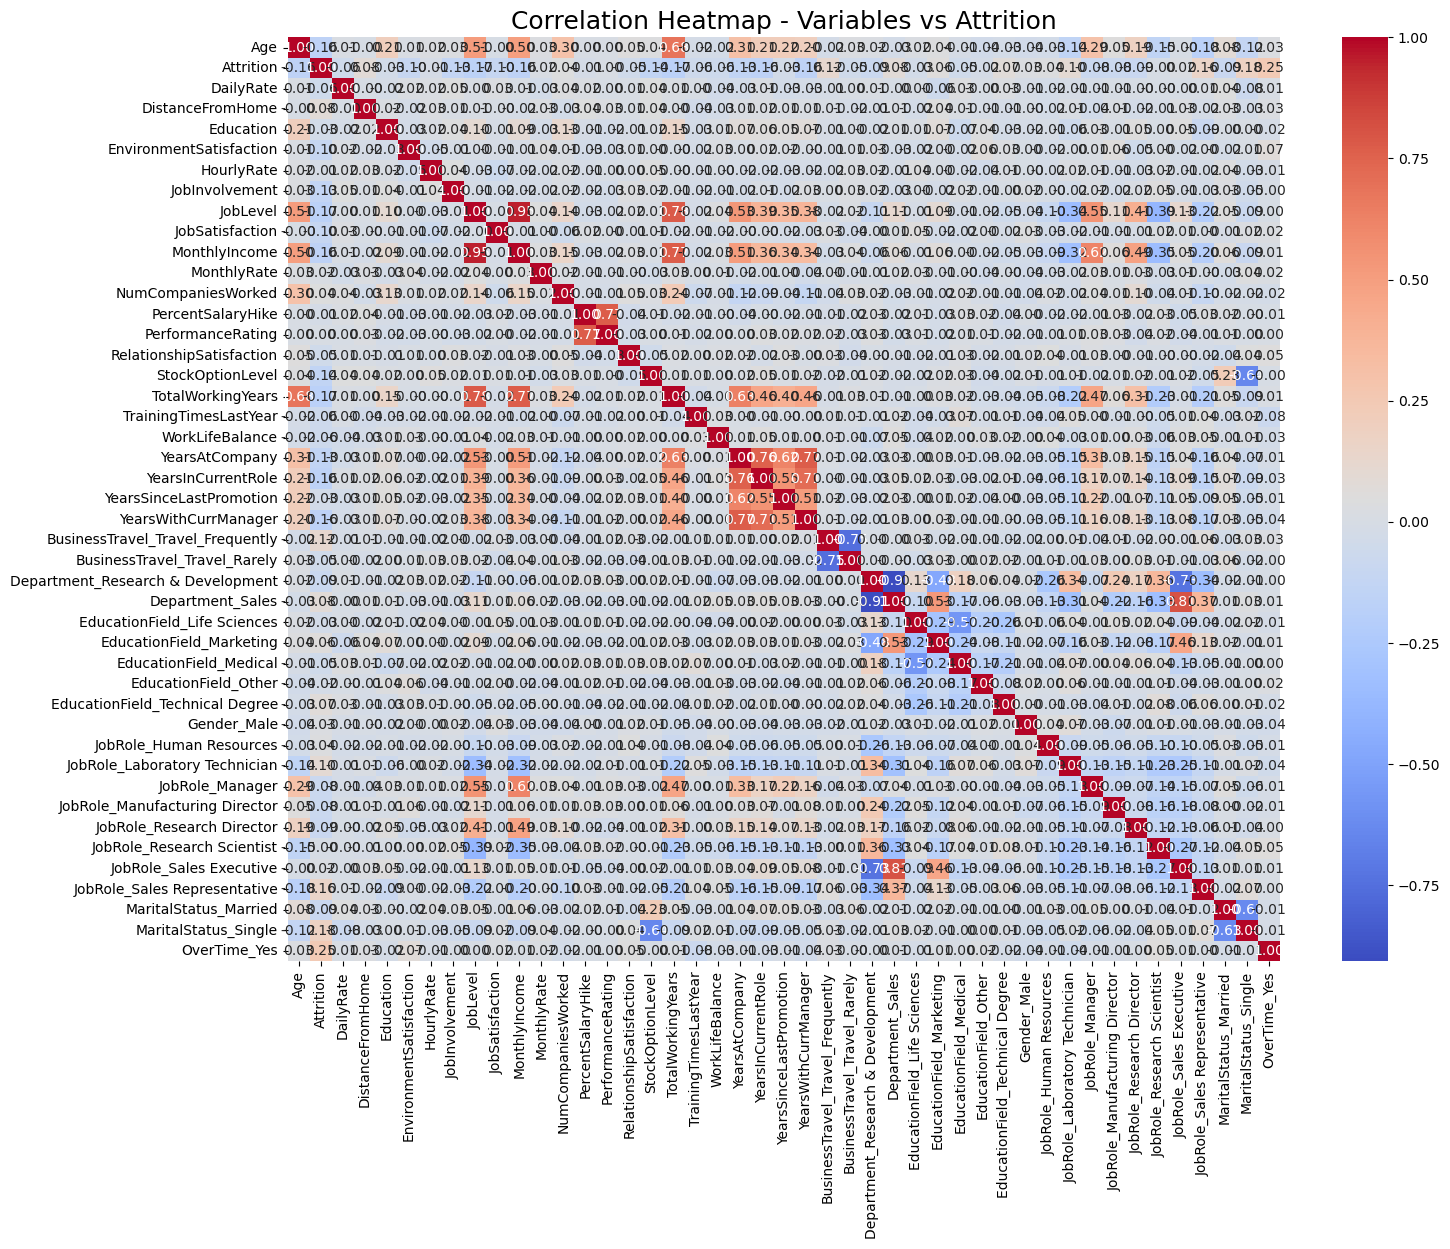

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'dataset_df' is your DataFrame containing the data

# Step 1: Drop unimportant columns
columns_to_drop = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber']
dataset_df = dataset_df.drop(columns=columns_to_drop)

# Step 2: Encode categorical variables
# Convert 'Attrition' to binary (Yes = 1, No = 0)
dataset_df['Attrition'] = dataset_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Encode other categorical variables as needed
# For simplicity, let's use pandas' get_dummies function which will automatically one-hot encode categorical variables
encoded_df = pd.get_dummies(dataset_df, drop_first=True)

# Step 3: Calculate the correlation matrix
correlation_matrix = encoded_df.corr()

# Step 4: Create the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Highlight the correlation with Attrition
plt.title('Correlation Heatmap - Variables vs Attrition', fontsize=18)
plt.show()


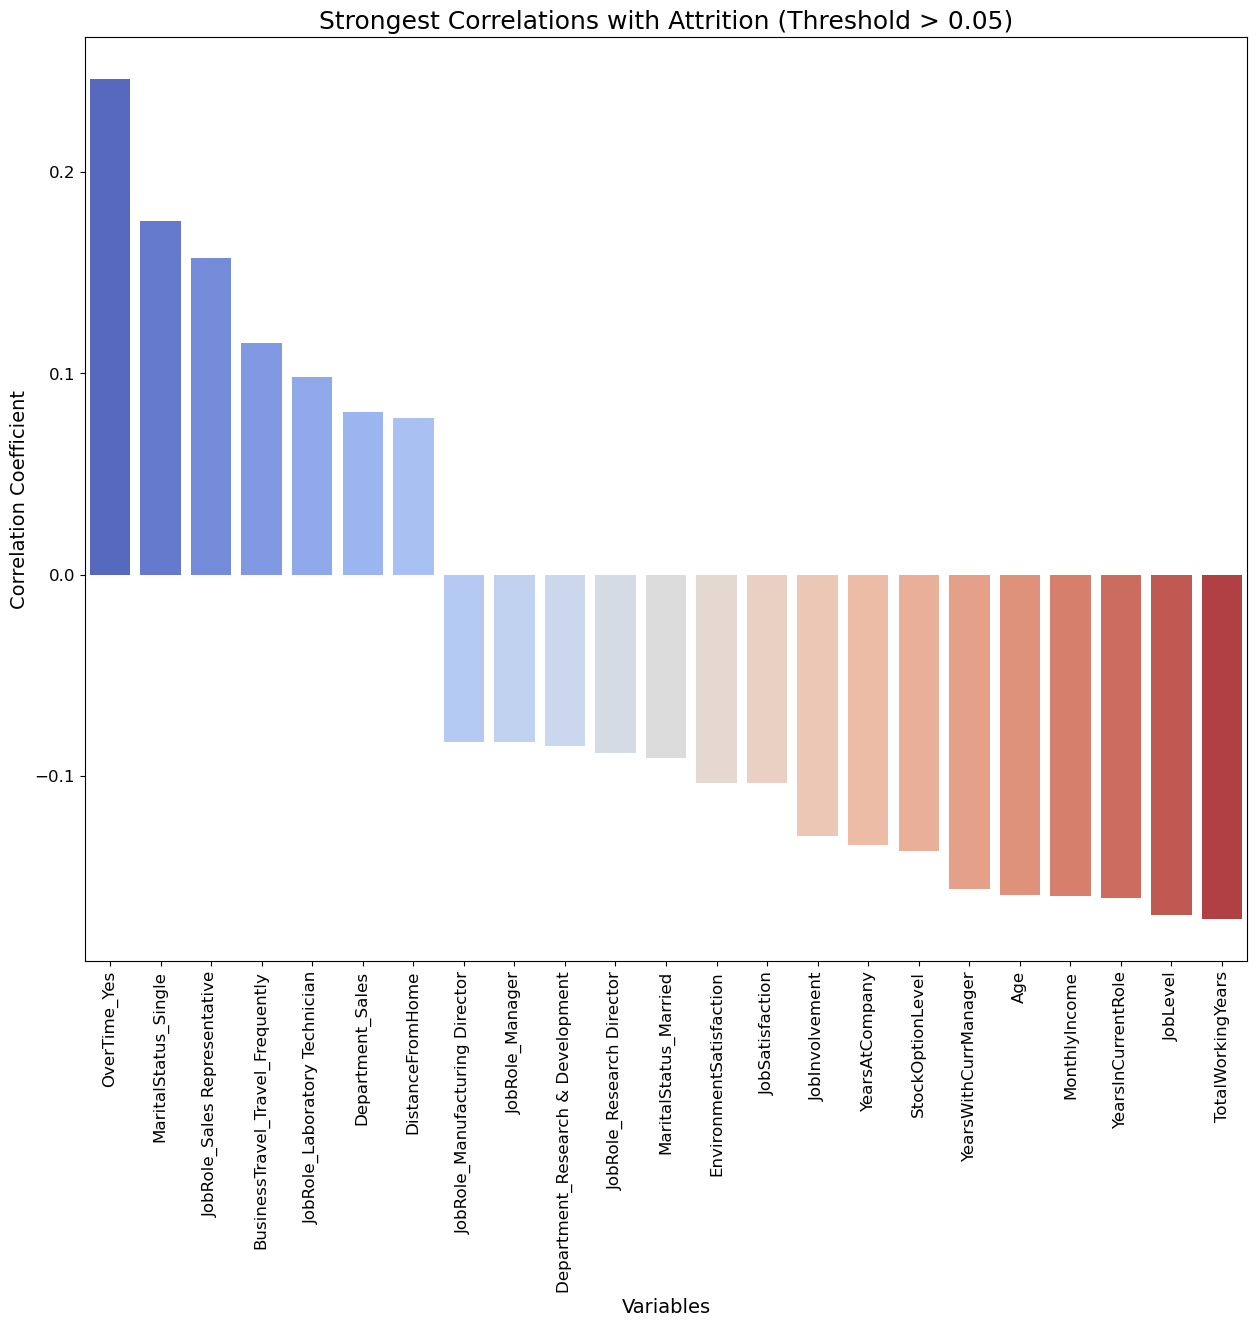

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get the correlations with Attrition, excluding Attrition itself
correlation_with_attrition = correlation_matrix['Attrition'].drop('Attrition').sort_values(ascending=False)

# Filter to show only correlations with absolute value > 0.05
strong_correlations = correlation_with_attrition[abs(correlation_with_attrition) >= 0.07]

# Plot these correlations with a larger figure size
plt.figure(figsize=(15, 12))
sns.barplot(x=strong_correlations.index, y=strong_correlations.values, palette='coolwarm')
plt.title('Strongest Correlations with Attrition (Threshold > 0.05)', fontsize=18)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.xlabel('Variables', fontsize=14)
plt.show()


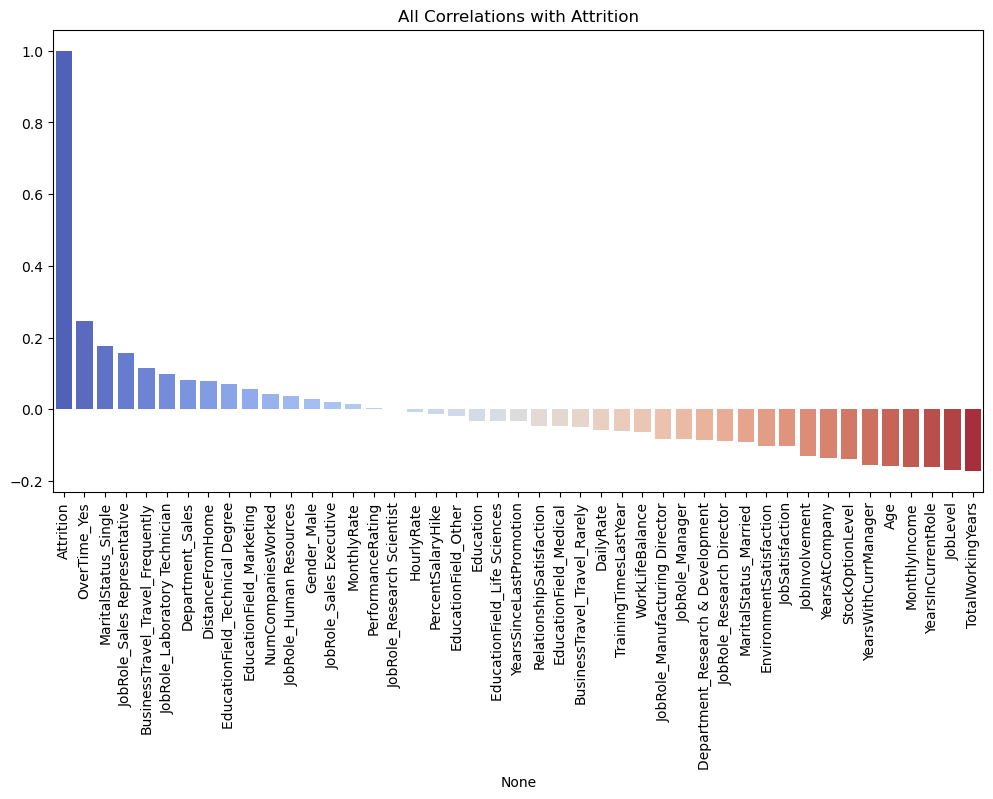

In [32]:
# Plot all correlations with Attrition
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_attrition.index, y=correlation_with_attrition.values, palette='coolwarm')
plt.title('All Correlations with Attrition')
plt.xticks(rotation=90)
plt.show()

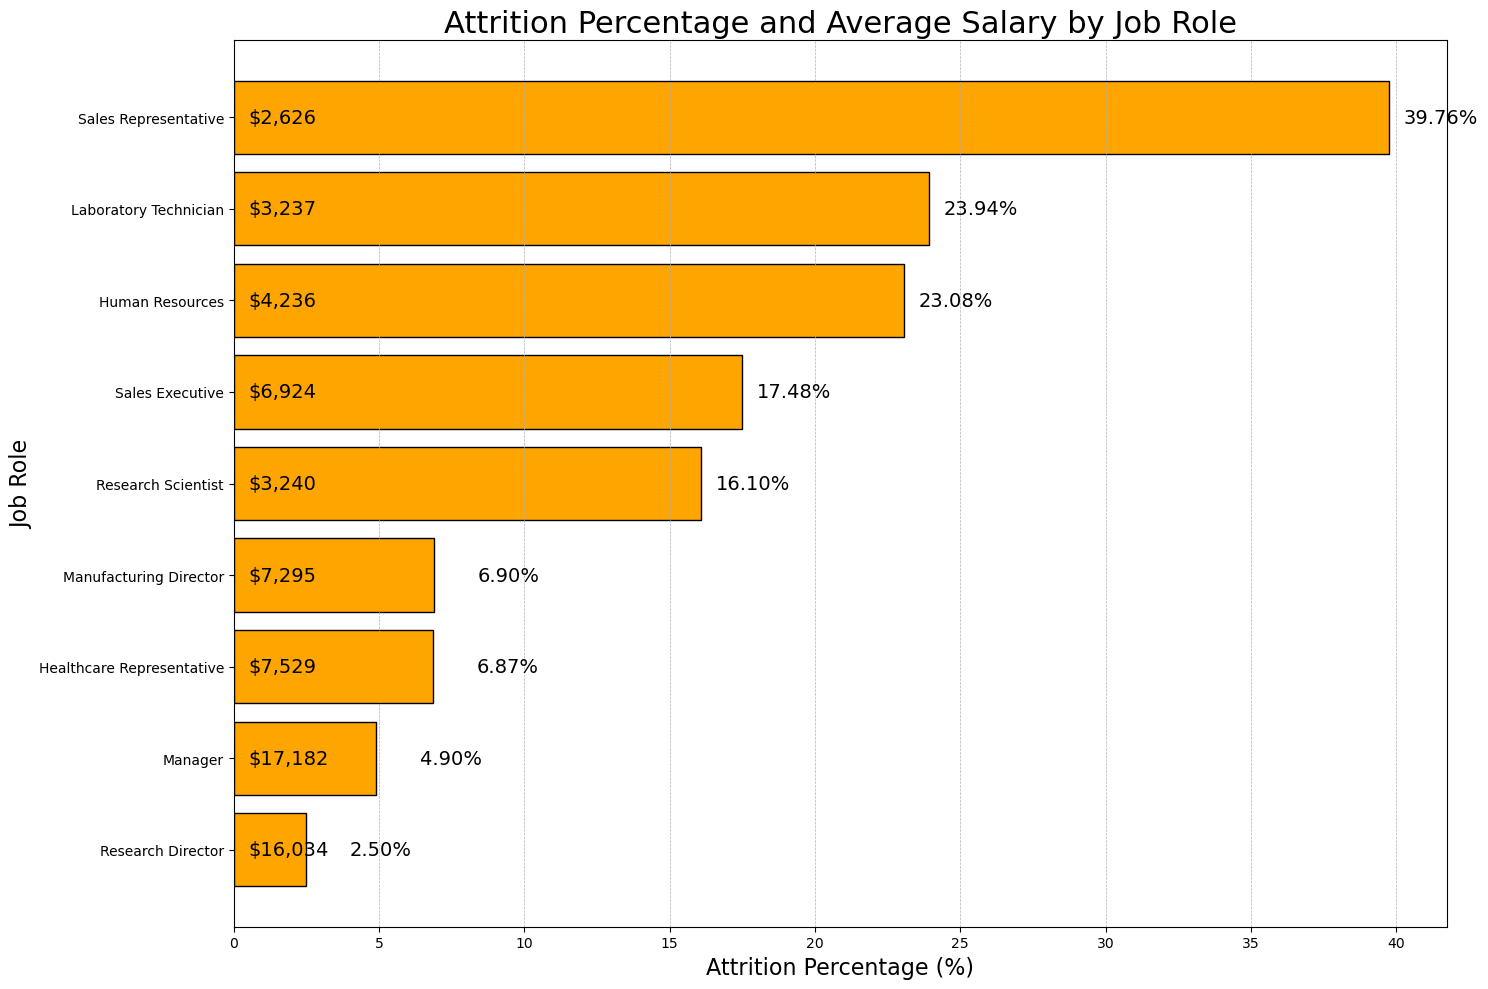

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'dataset_df' is your DataFrame containing the data

# Calculate the total number of employees and the number who left (attrition) in each job role
jobrole_attrition_counts = dataset_df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack() * 100

# Calculate the average salary by JobRole
jobrole_avg_salary = dataset_df.groupby('JobRole')['MonthlyIncome'].mean()

# Sort job roles by attrition percentage (descending order)
jobrole_attrition_counts = jobrole_attrition_counts.sort_values(by='Yes', ascending=True)

# Plot attrition percentage for each job role
plt.figure(figsize=(15, 10))
bars = plt.barh(jobrole_attrition_counts.index, jobrole_attrition_counts['Yes'], color='#FFA500', edgecolor='black')
plt.title('Attrition Percentage and Average Salary by Job Role', fontsize=22)
plt.xlabel('Attrition Percentage (%)', fontsize=16)
plt.ylabel('Job Role', fontsize=16)
plt.grid(True, axis='x', linestyle='--', linewidth=0.5)

# Annotate the bars with the attrition percentage at the end and average salary starting from the left
for index, bar in enumerate(bars):
    value = jobrole_attrition_counts['Yes'][index]
    avg_salary = jobrole_avg_salary[jobrole_attrition_counts.index[index]]
    
    # Shift percentage to the right slightly more for smaller values
    offset = 0.5 if value > 10 else 1.5
    plt.text(value + offset, bar.get_y() + bar.get_height()/2, f'{value:.2f}%', va='center', fontsize=14, color='black')
    
    # Average salary starting from the left of the bar
    plt.text(0.5, bar.get_y() + bar.get_height()/2, f'${avg_salary:,.0f}', va='center', fontsize=14, color='black')

# Tighten layout to prevent overlap
plt.tight_layout()
plt.show()


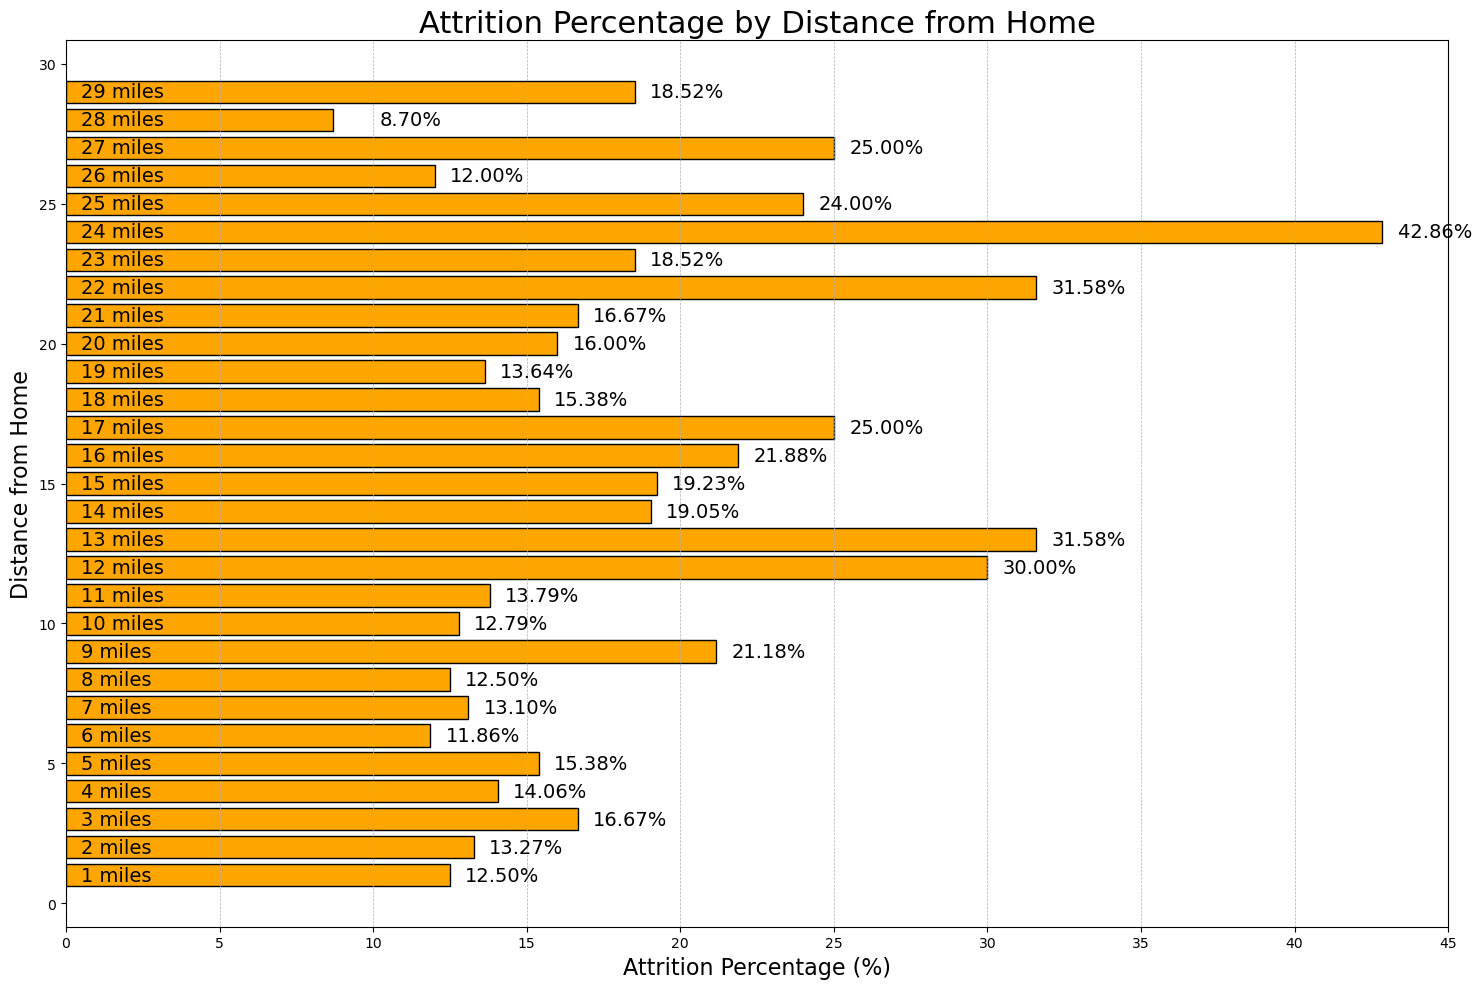

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'dataset_df' is your DataFrame containing the data

# Calculate the total number of employees and the number who left (attrition) for each DistanceFromHome
distance_attrition_counts = dataset_df.groupby('DistanceFromHome')['Attrition'].value_counts(normalize=True).unstack() * 100

# Sort distance categories by attrition percentage (descending order)
distance_attrition_counts = distance_attrition_counts.sort_values(by='Yes', ascending=False)

# Plot attrition percentage for each DistanceFromHome
plt.figure(figsize=(15, 10))
bars = plt.barh(distance_attrition_counts.index, distance_attrition_counts['Yes'], color='#FFA500', edgecolor='black')
plt.title('Attrition Percentage by Distance from Home', fontsize=22)
plt.xlabel('Attrition Percentage (%)', fontsize=16)
plt.ylabel('Distance from Home', fontsize=16)
plt.grid(True, axis='x', linestyle='--', linewidth=0.5)

# Annotate the bars with the attrition percentage at the end and the distance starting from the left
for index, bar in enumerate(bars):
    value = distance_attrition_counts['Yes'].iloc[index]
    avg_distance = distance_attrition_counts.index[index]
    
    # Shift percentage to the right slightly more for smaller values
    offset = 0.5 if value > 10 else 1.5
    plt.text(value + offset, bar.get_y() + bar.get_height()/2, f'{value:.2f}%', va='center', fontsize=14, color='black')
    
    # Distance from home starting from the left of the bar
    plt.text(0.5, bar.get_y() + bar.get_height()/2, f'{avg_distance:.0f} miles', va='center', fontsize=14, color='black')

# Tighten layout to prevent overlap
plt.tight_layout()
plt.show()


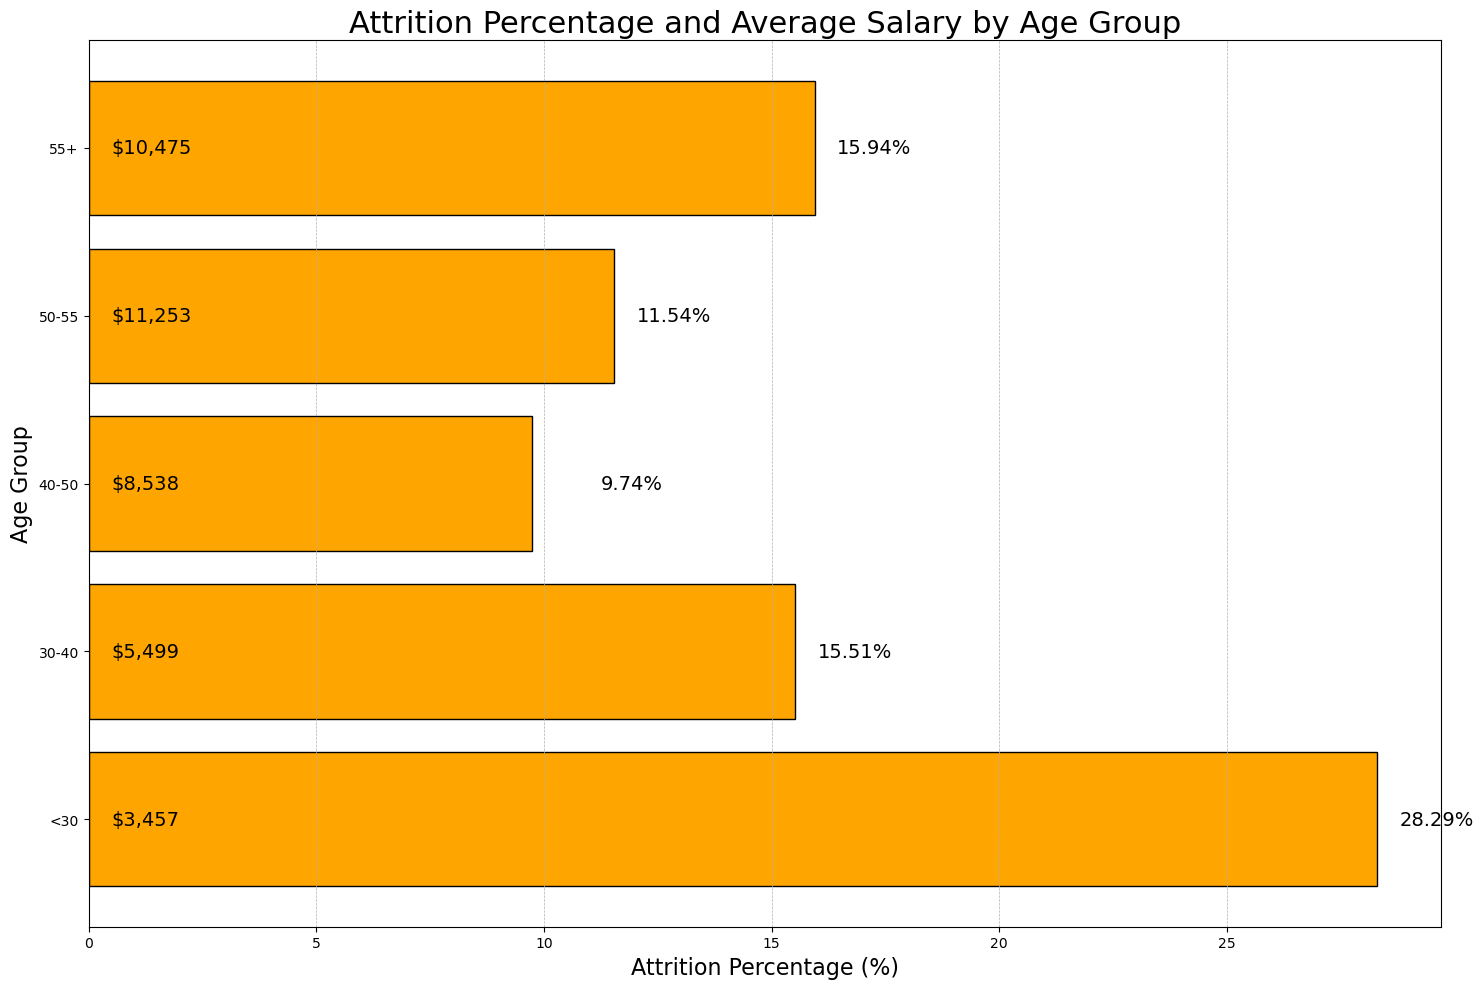

In [68]:


# Create age groups
bins = [18, 29, 40, 50, 55, 100]
labels = ['<30', '30-40', '40-50', '50-55', '55+']
dataset_df['AgeGroup'] = pd.cut(dataset_df['Age'], bins=bins, labels=labels, right=False)

# Calculate the total number of employees and the number who left (attrition) for each AgeGroup
agegroup_attrition_counts = dataset_df.groupby('AgeGroup')['Attrition'].value_counts(normalize=True).unstack() * 100

# Calculate the average salary by AgeGroup
agegroup_avg_salary = dataset_df.groupby('AgeGroup')['MonthlyIncome'].mean()

# Plot attrition percentage for each AgeGroup
plt.figure(figsize=(15, 10))
bars = plt.barh(agegroup_attrition_counts.index, agegroup_attrition_counts['Yes'], color='#FFA500', edgecolor='black')
plt.title('Attrition Percentage and Average Salary by Age Group', fontsize=22)
plt.xlabel('Attrition Percentage (%)', fontsize=16)
plt.ylabel('Age Group', fontsize=16)
plt.grid(True, axis='x', linestyle='--', linewidth=0.5)

# Annotate the bars with the attrition percentage at the end and average salary in the middle
for index, bar in enumerate(bars):
    value = agegroup_attrition_counts['Yes'].iloc[index]
    avg_salary = agegroup_avg_salary.iloc[index]
    
    # Shift percentage to the right slightly more for smaller values
    offset = 0.5 if value > 10 else 1.5
    plt.text(value + offset, bar.get_y() + bar.get_height()/2, f'{value:.2f}%', va='center', fontsize=14, color='black')
    
    # Average salary starting from the left of the bar
    plt.text(0.5, bar.get_y() + bar.get_height()/2, f'${avg_salary:,.0f}', va='center', fontsize=14, color='black')

# Tighten layout to prevent overlap
plt.tight_layout()
plt.show()
